In [1]:
from bs4 import BeautifulSoup as bs
# !pip3 install networkx
# !pip3 install matplotlib
import requests


next_page = "https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas" #starting wikipedia page
a_links = [] #table of Wikipedia articles
b_links = []

flag = True #boolean
dict = {}

while flag: 

    res = requests.get(next_page)  #request page
#     print(res.text)
    soup = bs(res.text, "html.parser") #beautiful page constructor
    flag = False 
    for link in soup.find_all("a"): #finds all the "a" classes in the webpage

        url = link.get("href", "") #gets all the hyperlinks from the "a" class
#         print(url)
        if "Volgend blad" in link.text.strip(): #if the link leads to the next page of all articles
            next_page = "https://vls.wikipedia.org" + url #change the starting wikipedia page to the next one
            print (next_page)
            flag = True  #change flag to true
            continue 

        if url=='https://vls.wikipedia.org/wiki/Specioal:AllePaginas': #if last page break
            break

        if "/wiki" in url: #if the link leads to another wiki page
            go_to = "https://vls.wikipedia.org" + url #save that link
#             print(url[6:])
            a_links.append(url[6:]) #link format /wiki/article, save the "article" name at the a_links list
                
matrix=[] #creates a zero content 2d matrix with the length and width of a_links list
for i in range(len(a_links)): 
    row=[] 
    for j in range(len(a_links)): 
        row.append(0) 
    matrix.append(row) 


https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=1472
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=1472
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=1773
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=1773
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=22+meie
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=22+meie
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=912
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=912
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=Annaatje+van+%27t+Pitje
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=Annaatje+van+%27t+Pitje
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=Bavette
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=Bavette
https://vls.wikipedia.org/w/index.php?title=Specioal

In [2]:
len(a_links)


11340

In [3]:
flag = True #flag = true
dict = {}
i = 0
j = 0
k = len(a_links)
d = []
next_page = "https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas" #resets the starting page 

while flag:
#     print(next_page)
#     print(len(dict))
    res = requests.get(next_page) 
#     print(res.text)
    soup = bs(res.text, "html.parser")
    flag = False
    for link in soup.find_all("a"):

        url = link.get("href", "")
#         print(url)
        if "Volgend blad" in link.text.strip(): #if the link leads to the next page of all articles
            next_page = "https://vls.wikipedia.org" + url #change the starting wikipedia page to the next one
            print (next_page)
            flag = True  #change flag to true
            continue 

        if url=='https://vls.wikipedia.org/wiki/Specioal:AllePaginas': #if last page break
            break

        if "/wiki" in url: #if the link leads to another wiki page
            go_to = "https://vls.wikipedia.org" + url #save that link
#             print(url[6:])
            
    #same as above till this line
            
#             print(go_to)
            res2 = requests.get(go_to) #requests each article's content
            soup2 = bs(res2.text, "html.parser") #bs constructor of each wikipedia article
            texts = soup2.find(class_="mw-parser-output") #finds the class of the main body of the article
#             print(texts)
            b_links.clear() 
            for links in texts.find_all('a'): #finds all the "a" classes in the article
                urls2 = links.get("href", "") #finds all the links from the "a" classes
                if "/wiki" in urls2: #if it leads to another wikipedia article
                    if not "redlink=1" in urls2: #ignores all links that lead to an article that does not exist
                        if not "action=edit" in urls2: #ignores all edit links of the article
                            if not "Ofbeeldienge" in urls2: #ignores all links that lead to a media file
                                if not ":" in urls2: #ignores all command links
                                    for j in range(0,k): #scans all the existing articles at a_links list
#                                         print (i)
#                                         print (j)
                                        if urls2[6:] == a_links[j]: #if the link name matches an existing name at that list
                                            matrix[i][j] = 1 #make that cell =1
            i = i + 1 #move to the next article
            

https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=1472
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=1472
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=1773
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=1773
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=22+meie
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=22+meie
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=912
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=912
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=Annaatje+van+%27t+Pitje
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=Annaatje+van+%27t+Pitje
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=Bavette
https://vls.wikipedia.org/w/index.php?title=Specioal:AllePaginas&from=Bavette
https://vls.wikipedia.org/w/index.php?title=Specioal

In [8]:
len(matrix)



11338

In [4]:
import networkx as nx
G = nx.DiGraph() #graph constructor
for u in range(len(a_links)): #scan the matrix table
    G.add_node(a_links[u]) #add all strings from a_links table as nodes
    for v in range(len(a_links)):
        if matrix[u][v] == 1: #if the is a non zero cell
            G.add_edge(a_links[u],a_links[v]) #make an edge between the urls2 article and the correspondant a_lists article
                

In [5]:
nx.number_of_isolates(G)

58

In [28]:
p = nx.clustering(G)
import operator
sorted_cluster_vl = sorted(p.items(), key = operator.itemgetter(1))
print(sorted_cluster_vl)

[('%27k_Zie_je_geirne', 0), ('0', 0), ('1000_(getal)', 0), ('Fuif', 0), ('100_v.Chr.', 0), ('112', 0), ('1174', 0), ('1177', 0), ('1182', 0), ('119', 0), ('1360', 0), ('Schryver', 0), ('217', 0), ('Verhandeling_op_d%27onacht_der_moederlyke_tael_in_de_Nederlanden', 0), ('183_v.Chr.', 0), ('Edgar_Bytebier', 0), ('Sagrada_Fam%C3%ADlia', 0), ('Daniel_Alli%C3%ABt', 0), ('194_v.Chr.', 0), ('200', 0), ('200_(getal)', 0), ('247_v.Chr.', 0), ('48', 0), ('25_v.Chr.', 0), ('92', 0), ('300', 0), ('300_(getal)', 0), ('316', 0), ('350_v.Chr.', 0), ('42_(getal)', 0), ('465', 0), ('4_v.Chr.', 0), ('500_(getal)', 0), ('500_v.Chr.', 0), ('500_v.C.', 0), ('52_v.Chr.', 0), ('531', 0), ('551_v.Chr.', 0), ('Zout', 0), ('57_v.Chr.', 0), ('60_v.Chr.', 0), ('%C3%8Aeste_triumviroat', 0), ('624_v.Chr.', 0), ('90', 0), ('700', 0), ('780', 0), ('Al-Khwarizmi', 0), ('850', 0), ('Binair_reeknn', 0), ('900_(getal)', 0), ('971', 0), ('A.C._Targa_Florio', 0), ('AMOLED', 0), ('Ectoare', 0), ('Academie_Dialect_Bachtn_de_

In [29]:
c = nx.degree_centrality(G)
import operator
sorted_centrality_vl = sorted(c.items(), key = operator.itemgetter(1))
print(sorted_centrality_vl)

[('%27k_Zie_je_geirne', 0.0), ('700', 0.0), ('AMOLED', 0.0), ('Amoled', 0.0), ('Badding', 0.0), ('Belgische_chocola', 0.0), ('Benzine_motor', 0.0), ('Binair_reekn%27n', 0.0), ('Buuze', 0.0), ('Cartesisch_product', 0.0), ('Discriminatie', 0.0), ('Epiloog', 0.0), ('Foto', 0.0), ('Gebruker_Andries_Van_den_Abeele', 0.0), ('Ik_zie_e_geirne', 0.0), ('Ja', 0.0), ('Keyse', 0.0), ('Lege_verzoamelienge', 0.0), ('Limiet', 0.0), ('Limieten', 0.0), ('L%C3%AAere', 0.0), ('L%C3%AAre', 0.0), ('Marmotte', 0.0), ('N%C3%A8%C3%A8n', 0.0), ('Oud_Voorblad', 0.0), ('Pachtwet', 0.0), ('Paintball', 0.0), ('Paris_La_D%C3%A9fense', 0.0), ('Patro%C3%B4n:_infobox_generiek', 0.0), ('Portaal:Attractieparken', 0.0), ('Roakel', 0.0), ('Rofl', 0.0), ('SNES', 0.0), ('Sagrada_familia', 0.0), ('Schoale_van_Beaufort', 0.0), ('Scylla', 0.0), ('Spelliengsalfabet_(NAVO)', 0.0), ('Stoande_wip', 0.0), ('Stutte', 0.0), ('Stuute', 0.0), ('Super_Nintendo_Entertainment_System', 0.0), ('Td', 0.0), ('Teknologie', 0.0), ('Th%C3%A9_dan

In [47]:
list(nx.all_neighbors(G,'Bevolkienge'))


['%27s-Gravenhage',
 '%27s-Hertogenbosch',
 'Aagtekerke',
 'Aalbeke',
 'Aalter',
 'Aardenburg',
 'Aarsele',
 'Aartrijke',
 'Abbekerke',
 'Abbeville',
 'Abruzzo',
 'Adiengkerke',
 'Adinkerke',
 'Aegte',
 'Aerenburg',
 'Afghanistan',
 'Aisne_(departement)',
 'Aix-en-P%C3%A9v%C3%A8le',
 'Aix-lez-Orchies',
 'Aix_(Noorderdepartement)',
 'Aix_(N%C3%B4orderdepartement)',
 'Aix_by_%C3%94orschie',
 'Aland',
 'Alandseilandn',
 'Albani%C3%AB',
 'Albano_(Lazio)',
 'Albano_Laziale',
 'Albano_di_Lucania',
 'Alboani%C3%AB',
 'Albugnano',
 'Algereye',
 'Alkmaar',
 'Allennes-les-Marais',
 'Almere',
 'Alpes-Maritimes',
 'Alpes-de-Haute-Provence',
 'Alvergem',
 'Alveringem',
 'Amburg',
 'Amerikoansche_Moagdneilandn',
 'Amersfoort',
 'Amsterdam',
 'Andalusi%C3%AB',
 'Anderlecht',
 'Andorra',
 'Andzoame',
 'Angers',
 'Angola',
 'Ann%C5%93ullin',
 'Ansoame',
 'Anstaing',
 'Antwerp%27n',
 'Antwerpen',
 'Antwerpn',
 'Antwerpn_(provincie)',
 'Antwerpn_(provinsje)',
 'Antwerp%E2%80%99n',
 'Anzegem',
 'Aosta',
 

In [46]:
deg=list(G.degree)
deg.sort(key = operator.itemgetter(1))
print(deg)

[('%27k_Zie_je_geirne', 0), ('700', 0), ('AMOLED', 0), ('Amoled', 0), ('Badding', 0), ('Belgische_chocola', 0), ('Benzine_motor', 0), ('Binair_reekn%27n', 0), ('Buuze', 0), ('Cartesisch_product', 0), ('Discriminatie', 0), ('Epiloog', 0), ('Foto', 0), ('Gebruker_Andries_Van_den_Abeele', 0), ('Ik_zie_e_geirne', 0), ('Ja', 0), ('Keyse', 0), ('Lege_verzoamelienge', 0), ('Limiet', 0), ('Limieten', 0), ('L%C3%AAere', 0), ('L%C3%AAre', 0), ('Marmotte', 0), ('N%C3%A8%C3%A8n', 0), ('Oud_Voorblad', 0), ('Pachtwet', 0), ('Paintball', 0), ('Paris_La_D%C3%A9fense', 0), ('Patro%C3%B4n:_infobox_generiek', 0), ('Portaal:Attractieparken', 0), ('Roakel', 0), ('Rofl', 0), ('SNES', 0), ('Sagrada_familia', 0), ('Schoale_van_Beaufort', 0), ('Scylla', 0), ('Spelliengsalfabet_(NAVO)', 0), ('Stoande_wip', 0), ('Stutte', 0), ('Stuute', 0), ('Super_Nintendo_Entertainment_System', 0), ('Td', 0), ('Teknologie', 0), ('Th%C3%A9_dansant', 0), ('Tolerantie', 0), ('Totsekop', 0), ('Traplere', 0), ('Vandalisme', 0), ('V

In [49]:
nx.average_clustering(G)
        


0.22090471381326954

In [51]:
import networkx as nx
L = nx.Graph() #graph constructor
for u in range(len(a_links)): #scan the matrix table
    for v in range(len(a_links)):
        if matrix[u][v] == 1: #if the is a non zero cell
            L.add_edge(a_links[u],a_links[v]) #make an edge between the urls2 article and the correspondant a_lists article
                
print(nx.average_shortest_path_length(L))


3.048966150011128


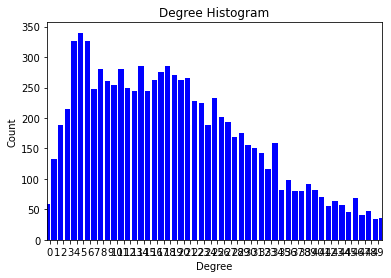

In [6]:
import collections
import matplotlib.pyplot as plt
import networkx as nx


degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xlim(0,50)

plt.savefig('flemish1.png', dpi=300)

In [62]:
nx.density(G)

0.002247800532048543

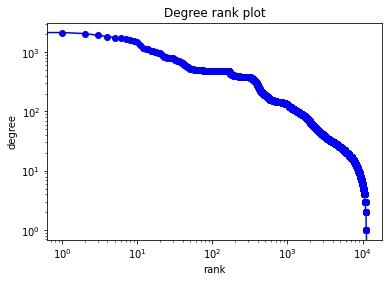

<Figure size 432x288 with 0 Axes>

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")


plt.show()

plt.savefig("degree_histogram_fl.png")

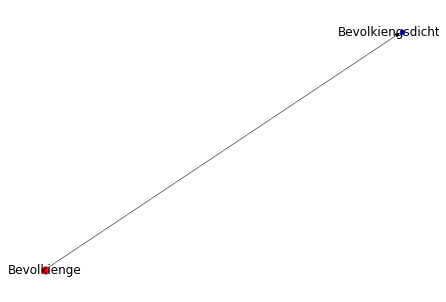

In [ ]:

from operator import itemgetter

import matplotlib.pyplot as plt
import networkx as nx

if __name__ == '__main__':
    # Create a BA model graph
    n = 1000
    m = 2
    # find node with largest degree
    node_and_degree = G.degree()
    (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
    # Create ego graph of main hub
    hub_ego = nx.ego_graph(G, largest_hub)
    # Draw graph
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='b', node_size=20, width=0.5, with_labels=True)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=50, node_color='r')
    plt.show()
    plt.savefig('flemish.png', dpi=400)